# Numerical Errors

Numerical errors arise from the use of approximations to represent operations
and exact mathematical quantities. These include:
<ol>
<li> Truncation errors that result from using approximations as an exact mathematical procedure. </li>

    
<li> rounding errors that occur when using numbers that have a limit of
significant figures to represent exact numbers. </li>
</ol>
For both types of errors, the relationship between the exact, or true, and the approximate result is given by
$$ RealValue = Approximation + Error $$
Therefore:
$$Error =  RealValue  - Approximation  $$

A disadvantage of this definition is that it does not take into account the order of the
magnitude of the value that is estimated.  A way to take
taking into account the magnitudes of the quantities being evaluated consists in normalizing the error
with respect to the true value:


$$ RelativeError = \frac{Error}{RealValue} = \frac{RealValue-Approximation}{RealValue}  $$

The Relative Error can also be multiplied by 100% to express it as the Rlative Percent Error:

$$ Rlative Percent Error = RelativeError*100 = \frac{RealValue-Approximation}{RealValue}*100  $$


## Other important errors: 

**Mean Squared Error (MSE):**

$$ MSE = \frac{1}{N}\sum_{i=1}^N(f_i-y_i)^2 $$

**Mean Squared Absolute(MAE):**

$$ MAE = \frac{1}{N}\sum_{i=1}^N|(f_i-y_i)| $$

# Taylor Seires
In order to look at truncation errors, lets look at taylor series:

 Taylor series of a function is an infinite sum of terms that are expressed in terms of the function's derivatives at a single point. If zero is the point where the derivatives are considered, a Taylor series is also called a Maclaurin series, after Colin Maclaurin, who made extensive use of this special case of Taylor series in the 18th century.

The partial sum formed by the n first terms of a Taylor series is a polynomial of degree n that is called the nth Taylor polynomial of the function. Taylor polynomials are approximations of a function, which become generally better when n increases.

**Definition:**
Suppose f is continuous on the closed interval $[a,b]$ and has $n+1$ continuous derivatives on the open inverval $(a,b)$.  If $ x$ , $c$ $ \in (a,b)$

$$ f(x) |_c= \sum_{n=0}^{\infty}\frac{f^{n}(c)(x-c)^{n}}{n!}$$

Taylors series are imporntat since they let us predict the next value if we have the value of the derivatives. 

**Example**
Get the 1st,2nd and 3rd  taylor series expanction of $ 3x^3 + 2x^2 + x + 10 $ evualuated at c=10 for the closed interval $[-20,20]$

In [174]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [175]:
c = 10
x = np.linspace(-20,20,200)
f_x = 3*x**3 + 2*x**2 + x + 10  # Function  this is a vector
f_x_c  = 3*10**3 + 2*10**2 + 20 # Function          evaluated in c  this is a Cte
f1_x_c = 9*10**2 + 4*10 + 1     # First Derivative  evaluated in c  this is a Cte
f2_x_c = 18*10 + 4              # Second Derivative evaluated in c  this is a Cte
f3_x_c = 18                     # Third Derivative  evaluated in c  this is a Cte

x_c = x-c # create a vector x-c 

T1 = f_x_c + f1_x_c*x_c # Taylor series first order
T2 = f_x_c + f1_x_c*x_c + (f2_x_c/(2*1))*x_c**2  # Taylor series second order
T3 = f_x_c + f1_x_c*x_c + (f2_x_c/(2*1))*x_c**2 + (f3_x_c/(3*2*1))*x_c**3  # Taylor series third order

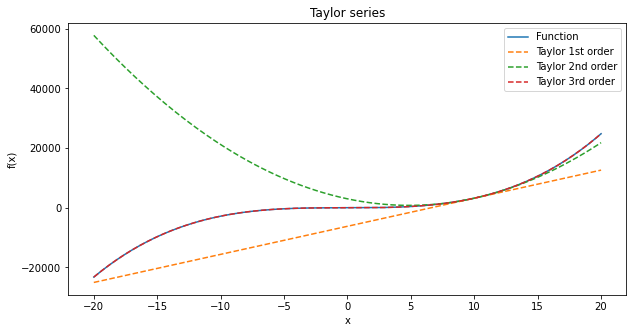

In [176]:
plt.figure(figsize=(10,5))
plt.plot(x,f_x,label="Function")
plt.plot(x,T1,"--",label="Taylor 1st order") 
plt.plot(x,T2,"--",label="Taylor 2nd order")
plt.plot(x,T3,"--",label="Taylor 3rd order")

### Make plot pretty ###
plt.legend()
plt.title("Taylor series")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

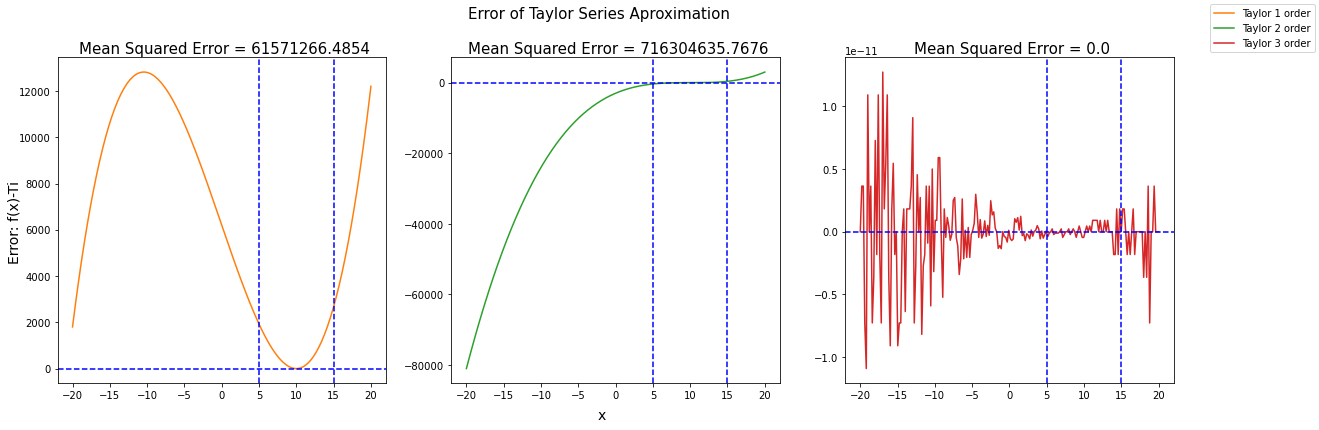

In [177]:
### Save Talyor approximations in a dictionary in order to iterarte over it  ###
Taylor_series = {}       # Init dictionary
Taylor_series["T1"] = T1 # Save Taylor 1st order
Taylor_series["T2"] = T2 # Save Taylor 2ns order
Taylor_series["T3"] = T3 # Save Taylor 3rd order
### Create a list of colors ###
colors = ["tab:orange","tab:green","tab:red"]
mean_squared_error= []
### Make plor ###
fig,axes = plt.subplots(figsize=(20,6),nrows=1,ncols=3) # Create a plot with 3 subplots, axes is a list containg the 3 axis
for i,axis in enumerate(axes):                          # Iterate over the axes, and enumarte 
    approximation =Taylor_series["T"+str(i+1)]          # Save Taylor i order  to aproximation  variable
    axis.plot(x,f_x - approximation,color=colors[i],label=f"Taylor {i+1} order")    # Plot the difference 
    axis.axhline(y=0, color='blue', linestyle='--') # plot zero line
    axis.axvline(x=5, color='blue', linestyle='--') # plot zero line
    axis.axvline(x=15, color='blue', linestyle='--') # plot zero line
    
    ### Calculate mean squared error ###
    mse = ((f_x-approximation)**2).sum()
    mse = mse/len(t)
    mean_squared_error.append(mse)
    
### make plot pretty ###  
fig.legend()  # Show legends 
fig.text(0.41, 0.98,'Error of Taylor Series Aproximation', va='center',size=15)
fig.text(0.14, 0.9,f'Mean Squared Error = {round(mean_squared_error[0],4)}', va='center',size=15)
fig.text(0.41, 0.9,f'Mean Squared Error = {round(mean_squared_error[1],4)}', va='center',size=15)
fig.text(0.72, 0.9,f'Mean Squared Error = {round(mean_squared_error[2],4)}', va='center',size=15)
fig.text(0.5, 0.05, 'x', va='center',size=14)
fig.text(0.09, 0.5, 'Error: f(x)-Ti', va='center', rotation='vertical',size=14)    
plt.show()



### Notes:
Notices that as the order of the Taylor series incresaes the error decreases. It is also improtant to no that since we are woeking with a polinomial of 3rd degre, it only has 3 derivitives, meaning that the higher order terms of the approximation are 0 so:

$$ f(x) |_c= \sum_{n=0}^{\infty}\frac{f^{n}(c)(x-c)^{n}}{n!} =  f(x) |_c= \sum_{n=0}^{3}\frac{f^{n}(c)(x-c)^{n}}{n!}$$

Theregfore we whould have expected that the the real erro should be 0, but due to the nature of computers this will never happen. Instead we get a small error  (in the order of maginittue $ 1e^{-11} $